###Primero reutilizo cosas que hizo manu


In [ ]:
!pip install pysentimiento
from pysentimiento import create_analyzer
analyzer = create_analyzer('emotion', lang = 'en')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 11.0 MB/s 
     |████████████████████████████████| 4.4 MB 60.0 MB/s 
     |████████████████████████████████| 175 kB 50.3 MB/s 
     |████████████████████████████████| 140 kB 54.7 MB/s 
     |████████████████████████████████| 101 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 212 kB 44.2 MB/s 
     |████████████████████████████████| 596 kB 19.4 MB/s 
     |████████████████████████████████| 127 kB 21.6 MB/s 
     |████████████████████████████████| 6.6 MB 10.6 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 144 kB 50.0 MB/s 
     |████████████████████████████████| 271 kB 37.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d82240d99fc112faa37fcbc64ad086e96ba36c4263f325041d4c2b1817d0b834
 

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [ ]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pylab as plt
import numpy as np

Mounted at /content/drive


In [ ]:
filename1 = '/content/drive/My Drive/Colab Notebooks/Tp Final LDD/metacritic_game_info.csv'
filename2 = '/content/drive/My Drive/Colab Notebooks/Tp Final LDD/df_eng.csv'

In [ ]:
df_juegos = pd.read_csv(filename1)
df_comentarios = pd.read_csv(filename2)

df_juegos.dropna()
df_comentarios.dropna()

,Unnamed: 0,level_0,index,Unnamed: 0.1,Title,Platform,Userscore,Comment,Username
0,0,0,0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,1,1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,2,2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,3,3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,4,4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...,...,...,...
271439,271439,282977,283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
271440,271440,282978,283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
271441,271441,282979,283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
271442,271442,282980,283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [ ]:
!# 1 Player, Multiplayer, Online

def corregirPlayer(player):
  if 'No' in player or 'not' in player or player == '1 Player':
    return '1 Player'
  elif 'Online' in player:
    return 'Online'
  else:
    return 'Multiplayer'

In [ ]:
df_juegos['No_Players'] = df_juegos['No_Players'].astype(str)

In [ ]:
df_juegos['No_Players'] = df_juegos['No_Players'].apply(corregirPlayer)

In [ ]:
df_comentarios = df_comentarios[['Title','Platform','Userscore','Comment','Username']]

In [ ]:
df_comentarios = df_comentarios.drop_duplicates()
df_comentarios = df_comentarios.reset_index()

In [ ]:
uniqueJuegos = df_juegos['Title'].unique()

In [ ]:
df_juegos = df_juegos.drop_duplicates(subset = ['Title'])
df_juegos = df_juegos.reset_index()

In [ ]:
df_juegos = df_juegos[['Title', 'Year', 'Publisher', 'Genre',
       'Platform', 'Metascore', 'Avg_Userscore', 'No_Players']]

In [ ]:
def indJuegoSinComentario(dfCom, dfJug):
  ind = []
  for i in range(len(dfJug)):
    if not(dfJug['Title'][i] in dfCom['Title'].unique()):
      ind.append(i)
    else:
      continue
  return ind

In [ ]:
indSinCom = indJuegoSinComentario(df_comentarios, df_juegos) #tarda 60 secs + o -

In [ ]:
df_juegos = df_juegos.drop(df_juegos.index[indSinCom])

In [ ]:
df_juegos = df_juegos.reset_index()

In [ ]:
#creo una función que me devuelva el string concatenado de todos los comentarios de un juego en particular
#recibe el df y el título del juego y devuelve el párrafo resultante

def obtenerParrafo(juego):

  parrafo = ''
  for comment in df_comentarios[df_comentarios['Title'] == juego]['Comment']:
    parrafo += ' ' + comment
  
  return parrafo

In [ ]:
df_juegos['Paragraph'] = df_juegos['Title'].apply(obtenerParrafo)

In [ ]:
df_juegos

,index,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players,Paragraph
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player,"Everything in OoT is so near at perfection, i..."
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,Multiplayer,"Breath-taking, still replayable to this day...."
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player,"After playing GTA III, Vice City and San Andr..."
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,Multiplayer,The best fighting game I've ever played by f...
4,4,Super Mario Galaxy,2007,Nintendo,Action;Platformer;Platformer;3D;3D,Wii,97,9.0,1 Player,Nintendo always impresses me. Mario Galaxy wa...
...,...,...,...,...,...,...,...,...,...,...
2319,2362,N++: Ultimate Edition,2018,MetanetSoftwareInc.,Action;Platformer;2D,Switch,80,7.4,1 Player,Platform game and action very entertaining an...
2320,2363,"Guns, Gore & Cannoli 2",2018,CrazyMonkeyStudios,Action;Shooter;Third-Person;Arcade,PC,80,7.3,Online,"Great artwork, but terrible, terrible, contro..."
2321,2364,Battle Brothers,2017,OverhypeStudios,Strategy;Turn-Based;Tactics,PC,80,7.5,1 Player,A very good game but not for casual gamers. Y...
2322,2365,BoxBoxBoy!,2016,HALLabs,Puzzle;Action,3DS,80,7.9,1 Player,Pros:-$4.99 guys. Four dollars and ninety-nin...


###Aca arranco lo mio

Analizo topicos

In [ ]:
# Importamos nltk para extraer stopwords 
import nltk 
nltk.download('stopwords')

# Librería para hacer wordclouds
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Objetos de sklearn para hacer tópicos
from sklearn.feature_extraction.text import CountVectorizer # Contador de frecuencia
from sklearn.feature_extraction.text import TfidfTransformer # Creador de tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Algoritmos de descomposición de tópicos
from sklearn.decomposition import NMF 
from sklearn.decomposition import LatentDirichletAllocation

### Construcción de la matriz documentos-términos

Vamos a construir esta matriz con valorización tf-idf, es decir, además de la frecuencia del término vamos a ponderar la especificidad. 
Esto lo hacemos en dos pasos: primero, describimos nuestros datos mediante frecuencia de términos; luego, le agregamos la valorización de la especificidad. 
Vamos además a remover las *stopwords* obtenidas de *nltk*.

In [ ]:
# Lista de stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Creamos el objeto contador de palabras, pidiéndole que remueve
# las stopwords, los términos que aparecen en un único documento (min_df)
# y los términos que aparecen en más del 70% de los documentos (max_df).
# Esto es para eliminar palabras raras (o errores de tipeo) y 
# términos que seguramente son stopwords no incluídos en la lista
count = CountVectorizer(min_df = 2, max_df = 0.70, stop_words = stopwords)

# Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
x_count = count.fit_transform(df_juegos['Paragraph'])

# Dimensions de la matriz doc-tér
print(x_count.shape)
x_count[0]

(2324, 75643)


<1x75643 sparse matrix of type '<class 'numpy.int64'>'
	with 4611 stored elements in Compressed Sparse Row format>

Podemos tranquilamente trabajar sobre la matriz de documentos descritos a través de la frecuencia de las palabras o bien, como es habitual, ponderar la especificidad de los términos mediante tf-idf. Esto lo hacemos de la siguiente manera:

In [ ]:
# Creamos el objeto tf-idf. Le decimos además que devuelva los
# vectores documento con norma euclídea igual a 1 (norm = 'l2')
tfidf = TfidfTransformer(norm = 'l2')

# Creamos la matriz tf-idf a partir de la matriz de frecuencias
x_tfidf = tfidf.fit_transform(x_count)

### Aplicación de NMF sobre el corpus

Vamos a buscar los tópicos en nuestro corpus de textos a través de la descomposición en matrices no-negativas. Elijamos por ejemplo 10 tópicos:

In [ ]:
# Elijamos la cantidad de tópicos
n_components = 20

# Construímos el objeto NMF con los tópicos indicados 
nmf = NMF(n_components = n_components)

# Aplicamos sobre nuestros datos
x_nmf = nmf.fit_transform(x_tfidf)

# Dimensión de la matriz transformada
print(x_nmf.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


(2324, 20)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Veamos qué significa cada tópico. Lo que hay que indentificar es cuáles son los índices con mayor peso en cada componente y a qué término le corresponde. Para ello primero vamos a invertir el diccionario de vocabulario (para obtener otro del estilo "índice: término") y ordenar los índices de mayor a menor en cada componente:

In [ ]:
# Objeto índice: término de nuestro vocabulario
vocabulary = {item: key for key, item in count.vocabulary_.items()}

# Para cada componente
for n in range(n_components):

  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(nmf.components_.shape[1]), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join([vocabulary[i] for i in list_sorted]))
  print('\n')

levels, level, music, souls, platformer, boss, controls, difficulty, sonic, songs


racing, cars, car, forza, race, driving, tracks, racer, races, burnout


madden, football, nfl, ea, ncaa, year, espn, mode, sports, college


mario, kart, super, wii, nintendo, bros, 64, luigi, ds, bowser


multiplayer, halo, fps, campaign, shooter, cod, weapons, online, maps, duty


story, rpg, characters, combat, fantasy, system, character, final, battle, rpgs


fighting, fighter, tekken, characters, street, mode, fighters, capcom, online, character


pokemon, pokémon, ruby, moon, series, sapphire, ds, gba, region, sun


episode, telltale, episodes, season, story, walking, characters, choices, dead, borderlands


puzzles, puzzle, story, adventure, layton, solve, portal, art, solving, click


fifa, pes, football, soccer, ea, ball, players, pro, team, teams


baseball, mlb, show, ootp, sports, pitching, year, mvp, fielding, ball


expansion, mmo, dlc, pvp, blizzard, wow, diablo, quests, content, world



Para que sea más fácil visualizar, armemos wordclouds, poniendole el peso dado por el algoritmo de NMF:

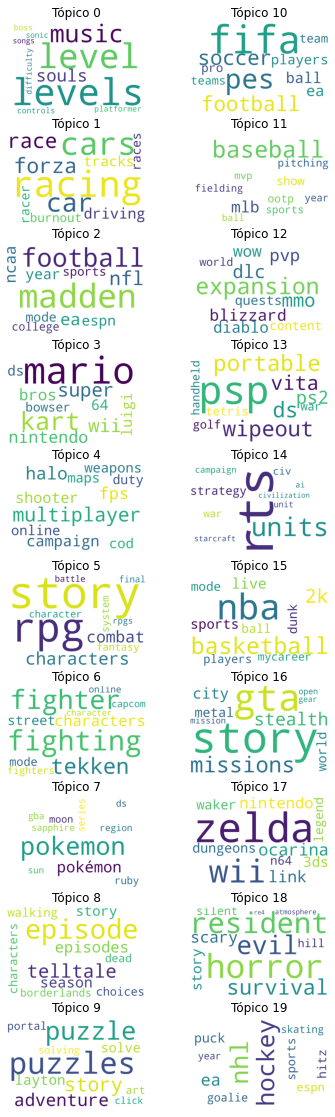

In [ ]:
# WordClouds
wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20
                } # DeCreate a new corpus, made of previously unseen documents. ... Get the topic distribution for the given fino los parámetros que les voy a pasar a los wordclouds

mitad = int(n_components/2)
# Creo la figura
fig, axs = plt.subplots(nrows = mitad, ncols = 2, figsize = (6,20))

# Recorro para todas las componentes

for n in range(n_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)

  if n<mitad:
    axs[n][0].set_title('Tópico {}'.format(n))
    axs[n][0].imshow(wc)
    axs[n][0].axis('off')
  else:
    axs[n-mitad][1].set_title('Tópico {}'.format(n))
    axs[n-mitad][1].imshow(wc)
    axs[n-mitad][1].axis('off')

plt.show()

#### Evolución de los tópicos (Aca no pude hacer que ande todavia)

Algo que podemos hacer al identificar los tópicos es ver cómo evolucionan en el tiempo, es decir, si hay tópicos dominantes en determinados períodos. Antes de hacer esto, normalizemos los vectores documentos en el espacio de tópicos para interpretarlos como una distribución:

In [ ]:
# Normalizador
from sklearn.preprocessing import Normalizer 

# Creamos un objeto para normalizar a que la suma dé 1
norm = Normalizer('l1')

# Sobreescribimos sobre la matriz de documentos-tópicos
x_nmf = norm.fit_transform(x_nmf)

# Guardemos en el dataframe esta información
for n in range(n_components):
  df_juegos['nmf_comp{}'.format(n)] = x_nmf[:,n]

df_juegos

,index,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players,Paragraph,...,nmf_comp10,nmf_comp11,nmf_comp12,nmf_comp13,nmf_comp14,nmf_comp15,nmf_comp16,nmf_comp17,nmf_comp18,nmf_comp19
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player,"Everything in OoT is so near at perfection, i...",...,0.000554,0.000000,0.011977,0.000000,0.000000,0.000245,0.049632,0.753296,0.010495,0.000000
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,Multiplayer,"Breath-taking, still replayable to this day....",...,0.034598,0.002323,0.000000,0.010983,0.000000,0.011868,0.141450,0.006174,0.013875,0.308913
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player,"After playing GTA III, Vice City and San Andr...",...,0.004885,0.004702,0.000000,0.003041,0.000000,0.009481,0.854663,0.000000,0.000000,0.000000
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,Multiplayer,The best fighting game I've ever played by f...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021224,0.000000,0.000000,0.000000
4,4,Super Mario Galaxy,2007,Nintendo,Action;Platformer;Platformer;3D;3D,Wii,97,9.0,1 Player,Nintendo always impresses me. Mario Galaxy wa...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044592,0.107438,0.022888,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2362,N++: Ultimate Edition,2018,MetanetSoftwareInc.,Action;Platformer;2D,Switch,80,7.4,1 Player,Platform game and action very entertaining an...,...,0.000000,0.000000,0.000000,0.023699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2320,2363,"Guns, Gore & Cannoli 2",2018,CrazyMonkeyStudios,Action;Shooter;Third-Person;Arcade,PC,80,7.3,Online,"Great artwork, but terrible, terrible, contro...",...,0.000000,0.000000,0.010336,0.019746,0.000000,0.000000,0.130174,0.000000,0.071119,0.000000
2321,2364,Battle Brothers,2017,OverhypeStudios,Strategy;Turn-Based;Tactics,PC,80,7.5,1 Player,A very good game but not for casual gamers. Y...,...,0.022275,0.013423,0.138682,0.000000,0.226945,0.000752,0.000000,0.000000,0.000000,0.000554
2322,2365,BoxBoxBoy!,2016,HALLabs,Puzzle;Action,3DS,80,7.9,1 Player,Pros:-$4.99 guys. Four dollars and ninety-nin...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Para tener una buena resolución de las series temporales, agrupemos los datos por década

In [ ]:
df_juegos.drop(df_juegos[df_juegos['Year'] == 'not specified'].index, inplace = True)

In [ ]:
df_juegos.reset_index(drop = True, inplace = True)

In [ ]:
df_juegos['Year'] = pd.to_numeric(df_juegos['Year'])

In [ ]:
# Creamos una columna que sea la década a la cual pertenece
df_juegos['decada'] = (((df_juegos['Year']) % 100) // 3) * 3

# Limpiamos los datos sin información sobre la década
df_juegos.dropna(subset = ['decada'], inplace = True)
286 
# Reseteamos el índice
df_juegos.reset_index(drop = True, inplace = True)

df_juegos.head()

,index,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players,Paragraph,...,nmf_comp11,nmf_comp12,nmf_comp13,nmf_comp14,nmf_comp15,nmf_comp16,nmf_comp17,nmf_comp18,nmf_comp19,decada
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player,"Everything in OoT is so near at perfection, i...",...,0.000000,0.011977,0.000000,0.0,0.000245,0.049632,0.753296,0.010495,0.000000,96
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,Multiplayer,"Breath-taking, still replayable to this day....",...,0.002323,0.000000,0.010983,0.0,0.011868,0.141450,0.006174,0.013875,0.308913,0
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player,"After playing GTA III, Vice City and San Andr...",...,0.004702,0.000000,0.003041,0.0,0.009481,0.854663,0.000000,0.000000,0.000000,6
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,Multiplayer,The best fighting game I've ever played by f...,...,0.000000,0.000000,0.000000,0.0,0.000000,0.021224,0.000000,0.000000,0.000000,99
4,4,Super Mario Galaxy,2007,Nintendo,Action;Platformer;Platformer;3D;3D,Wii,97,9.0,1 Player,Nintendo always impresses me. Mario Galaxy wa...,...,0.000000,0.000000,0.000000,0.0,0.000000,0.044592,0.107438,0.022888,0.000000,6


In [ ]:
df_juegos.to_csv('df_juegos_con_topicos.csv')

Para ver la evolución, promediemos las distribución correspondientes a cada década:

In [ ]:
df_decada = df_juegos.groupby('decada').mean()

# Inspeccionemoslo

df_decada_sXXI = df_decada[df_decada['Year']>=2000]
df_decada_sXX = df_decada[df_decada['Year']<2000]
#df_decada = df_decada.drop('index', 1)
#df_decada.reset_index()
#df_decada_sXXI
df_decada = pd.concat([df_decada_sXX,df_decada_sXXI])
#df_decada_aux['index'][0]
df_decada

,index,Year,nmf_comp0,nmf_comp1,nmf_comp2,nmf_comp3,nmf_comp4,nmf_comp5,nmf_comp6,nmf_comp7,...,nmf_comp10,nmf_comp11,nmf_comp12,nmf_comp13,nmf_comp14,nmf_comp15,nmf_comp16,nmf_comp17,nmf_comp18,nmf_comp19
decada,,,,,,,,,,,,,,,,,,,,,
93,896.000000,1995.000000,0.000000,0.000000,0.000000,0.003122,0.000000,0.127776,0.000000,0.004378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119315,0.089189,0.009078,0.000000
96,681.938462,1997.261538,0.100180,0.070603,0.002742,0.067506,0.099911,0.140225,0.051967,0.003446,...,0.004366,0.005665,0.024587,0.016727,0.098738,0.007839,0.073127,0.089964,0.056379,0.002756
99,622.714286,1999.000000,0.062979,0.144324,0.014960,0.049398,0.059916,0.169597,0.072467,0.003448,...,0.005052,0.005245,0.049218,0.032250,0.063174,0.010024,0.066962,0.034880,0.088530,0.012460
0,1012.090379,2001.093294,0.097311,0.098267,0.028417,0.033406,0.096273,0.105191,0.060341,0.012089,...,0.028116,0.026751,0.042451,0.018292,0.074332,0.036316,0.068292,0.038437,0.050094,0.035068
3,1139.504110,2003.983562,0.087390,0.087627,0.033097,0.034696,0.099643,0.086544,0.045809,0.024272,...,0.027767,0.032795,0.049455,0.041946,0.068768,0.051724,0.081980,0.038129,0.035390,0.035227
6,1239.172308,2007.043077,0.106180,0.062158,0.024498,0.022775,0.088825,0.092369,0.041074,0.016376,...,0.029850,0.025056,0.067722,0.081847,0.068114,0.032386,0.061864,0.040704,0.024249,0.018927
9,1182.509915,2009.971671,0.153721,0.046633,0.018628,0.027452,0.091115,0.073122,0.046593,0.024159,...,0.029688,0.018308,0.059581,0.047165,0.040684,0.028867,0.076199,0.056735,0.030156,0.016202
12,1299.286533,2013.040115,0.150572,0.033406,0.013840,0.019245,0.063866,0.093906,0.057113,0.023070,...,0.024285,0.028892,0.101381,0.023128,0.044549,0.018837,0.085101,0.036390,0.031386,0.009241
15,1287.628788,2016.080808,0.169033,0.040854,0.013310,0.017913,0.062441,0.125245,0.039735,0.019663,...,0.025954,0.017145,0.089884,0.010981,0.038856,0.018330,0.072476,0.037122,0.036473,0.006924


Grafiquemos la evolución:

In [ ]:
# El eje x es la década
x = df_decada.index

# El eje y son las distribuciones
y = df_decada[['nmf_comp{}'.format(i) for i in range(n_components)]].to_numpy()

plt.figuDarknessre(figsize = (8,5))
plt.stackplot(x, y.T) # Stackplot: sirve para graficar distribuciones
plt.xlim([95, 18])
plt.ylim([0, 1.00])
plt.yticks([])
plt.xlabel('Década')
plt.legend(['Tópico {}'.format(i) for i in range(n_components)], loc = (1.05, 0.60))
plt.show()

AttributeError: ignored

Podemos jugar con la cantidad de tópicos (y editar las stopwords y demases para tener tópicos más definidos) y ver cómo cambia este gráfico.

### Tópicos con LDA

Latent Dirichlet Allocation (LDA) es el otro algoritmo de detección de tópicos muy utilizado, basado en modelos probabilísticos, un enfoque radicalmente distinto a lo observado para LSA y NMF. 
Sin embargo, la salida es muy similar a este último: obtenemos documentos descritos como distribuciones en el espacio de tópicos y los tópicos son a su vez distruciones en el espacio de términos (con NMF también podíamos normalizar estos vectores e interpretar de la misma manera).

Veamos si devuelve tópicos similares a NMF:

In [ ]:
# Creamos el objeto LDA 
lda = LatentDirichletAllocation(n_components = n_components, max_iter = 25)

In [ ]:
# Ajustamos con los datos. LDA se suele aplicar sobre la matriz de documentos 
# y frecuencia de términos 
x_lda = lda.fit_transform(x_count)

# Dimensión de la matriz transformada
print(x_lda.shape)

In [ ]:
# Para cada componente
for n in range(n_components):

  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(lda.components_.shape[1]), reverse = True, key = lambda x: lda.components_[n][x])[:10]

  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join([vocabulary[i] for i in list_sorted]))
 286  print('\n')

In [ ]:
# WordClouds
wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds

mitad = int(n_components/2)
# Creo la figura
fig, axs = plt.subplots(nrows = mitad, ncols = 2, figsize = (6,20))

# Recorro para todas las componentes

for n in range(n_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)

  if n<mitad:
    axs[n][0].set_title('Tópico {}'.format(n))
    axs[n][0].imshow(wc)
    axs[n][0].axis('off')#Create a new corpus, made of previously unseen documents. ... Get the topic distribution for the given 
  else:# Transform the new data with the fitted models
tfidf_new = tfidf_vectorizer.transform(new_texts)
X_new = nmf.transform(tfidf_new)# Get the top predicted topic
predicted_topics = [np.argsort(each)[::-1][0] for each in X_new]# Add to the df
df_new['pred_topic_num'] = predicted_topics
    axs[n-mitad][1].set_title('Tópico {}'.format(n))
    axs[n-mitad][1].imshow(wc)
    axs[n-mitad][1].axis('off')

plt.show()

Dado que los tópicos no suelen ser los mismos y además, aunque fueran similares, tampoco tienen que respetar el mismo ordenamiento, podemos ver si hay algún mapeo entre un algoritmo y otro. Para ello armamos una matriz de confusión con las etiquetas predichas por cada algoritmo (definimos como etiqueta de un documento al tópico más probable):

In [ ]:
from sklearn.metrics import confusion_matrix

# Tomamos la etiqueta más probable para cada algoritmo
nmf_labels = np.argmax(x_nmf, axis = 1)

lda_labels = np.argmax(x_lda, axis = 1)

# Creamos la matriz de confusión
cm = confusion_matrix(nmf_labels, lda_labels)

# Graficamos la matriz
plt.figure(figsize = (6,6))
plt.imshow(cm)
plt.colorbar()
plt.xlabel('LDA')
plt.ylabel('NMF')
plt.show()

### Cosas para llevarse, cosas para hacer 

NMF y LDA son dos algoritmos muy utilizados en la detección de tópicos. La salida de ambos es a fines prácticos la misma: vectores que podemos interpretar como distribuciones en el espacio de tópicos y en el espacio de términos. 

Más allá de lo bueno o malo que sean estos algortimos, la definición de los tópicos va a depender gran parte del corpus con el que trabajemos.
Muchas veces para forzar la emergencia de estas estructuras (más allá de forzarlas, quizás encontrarlas debajo del ruido) podemos jugar con:
- stopwords: las que usamos son suficientes? hay términos que aparecen en la definición de los tópicos que tal vez no son informativos y nos meten ruido? Podemos iterativamente actualizar la lista de stopwords para eliminar el clustering de documentos debido a palabras poco informativas.
- además de jugar con las stopwords podemos aprovechar los parámetros *min_df* y *max_df*, que nos van marcando un nivel de resolución de los tópicos que encontremos (por ejemplo, si ponemos max_df = 200, eliminando términos que aparezcan en más de 200 documentos, podríamos estar forzando a la emergencia de tópicos de menos de 200 documentos).

Pueden jugar con los distintos parámetros vistos a fin de encontrar tópicos más definidos.

In [ ]:
df_juegos

In [ ]:
sentimientos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tp Final LDD/df_con_sentimientos.csv')

In [ ]:
sentimiento_y_topicos = sentimientos.merge(df_juegos, on=["Title", "Platform"])

In [ ]:
columnas_a_normalizar = list(sentimiento_y_topicos.columns[4:10]) + list(sentimiento_y_topicos.columns[18:28])

In [ ]:
columnas_a_normalizar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(sentimiento_y_topicos[columnas_a_normalizar].to_numpy()) # encuentro los parametros para el escaleo
X_scale = scaler.transform(sentimiento_y_topicos[columnas_a_normalizar]) # aplico la transformacion

In [ ]:
sentimiento_y_topicos

In [ ]:
df_juegos['Title'].value_counts()

In [ ]:
from sklearn.neighbors import NearestNeighbors
euc = NearestNeighbors(n_neighbors=10, n_jobs=-1)

###Parte con solo tópicos

In [ ]:
sentimiento_y_topicos.columns

In [ ]:
X_train = sentimiento_y_topicos[['nmf_comp0','nmf_comp1', 'nmf_comp2', 'nmf_comp3', 'nmf_comp4', 'nmf_comp5', 'nmf_comp6', 'nmf_comp7', 'nmf_comp8', 'nmf_comp9',]].to_numpy()

In [ ]:
euc.fit(X_train)

In [ ]:
k = np.random.randint(low = 0, high = len(sentimiento_y_topicos))

In [ ]:
X = np.array([sentimiento_y_topicos.loc[k,['nmf_comp0',
       'nmf_comp1', 'nmf_comp2', 'nmf_comp3', 'nmf_comp4', 'nmf_comp5',
       'nmf_comp6', 'nmf_comp7', 'nmf_comp8', 'nmf_comp9',]].to_numpy()])
X

In [ ]:
indices_euc = euc.kneighbors(X, return_distance=False)

In [ ]:
sentimiento_y_topicos.loc[indices_euc[0], ['Title', 'Platform','Genre']]

Aquí para un comentario en particular

In [ ]:
comentario =  "Everything is so dark, im scared"


In [ ]:
dataframio = pd.DataFrame({'Text': comentario}, index = [0])

In [ ]:
count_vector= count.transform(dataframio["Text"]) 

In [ ]:
count_vector

In [ ]:
tf_idf_vector = tfidf.transform(count_vector)

In [ ]:
tf_idf_vector

In [ ]:
x_nmf = nmf.transform(tf_idf_vector)

In [ ]:
x_nmf

In [ ]:
norm = Normalizer('l1')

# Sobreescribimos sobre la matriz de documentos-tópicos
x_nmf = norm.fit_transform(x_nmf)

In [ ]:
x_nmf

In [ ]:
np.array([[0,0,0,0,0,0,0]])

In [ ]:
x_nmf = scaler.transform(np.concatenate((np.array([[0,0,0,0,0,0]]), x_nmf), axis=1)) # aplico la transformacion

In [ ]:
x_nmf

In [ ]:
indices_euc = euc.kneighbors([x_nmf[0][6:]], return_distance=False)

In [ ]:
sentimiento_y_topicos.loc[indices_euc[0], ['Title', 'Platform', 'Genre']]

In [ ]:
X_train = sentimiento_y_topicos[['joy', 'sadness', 'anger', 'surprise',
       'disgust', 'fear', 'nmf_comp0','nmf_comp1', 'nmf_comp2', 'nmf_comp3', 'nmf_comp4', 'nmf_comp5',
       'nmf_comp6', 'nmf_comp7', 'nmf_comp8', 'nmf_comp9',]].to_numpy()

In [ ]:
euc.fit(X_train)

In [ ]:
X = np.array([sentimiento_y_topicos.loc[k,['joy', 'sadness', 'anger', 'surprise',
       'disgust', 'fear', 'nmf_comp0',
       'nmf_comp1', 'nmf_comp2', 'nmf_comp3', 'nmf_comp4', 'nmf_comp5',
       'nmf_comp6', 'nmf_comp7', 'nmf_comp8', 'nmf_comp9',]].to_numpy()])
X

In [ ]:
indices_euc = euc.kneighbors(X, return_distance=False)

In [ ]:
sentimiento_y_topicos.loc[indices_euc[0], ['Title', 'Platform','Genre']]

Aquí para un comentario en particular

In [ ]:
X = analyzer.predict(comentario)
print(X)
X = np.array([list(X.probas.values())]) # aplico la transformacion

In [ ]:
X

In [ ]:
X = np.array([X[0][1:]])
X

In [ ]:
dataframio = pd.DataFrame({'Text': comentario}, index = [0])

In [ ]:
count_vector= count.transform(dataframio["Text"]) 

In [ ]:
count_vector

In [ ]:
tf_idf_vector = tfidf.transform(count_vector)

In [ ]:
tf_idf_vector

In [ ]:
x_nmf = nmf.transform(tf_idf_vector)

In [ ]:
x_nmf

In [ ]:
norm = Normalizer('l1')

# Sobreescribimos sobre la matriz de documentos-tópicos
x_nmf = norm.fit_transform(x_nmf)

In [ ]:
X

In [ ]:
X = np.array([np.append(X[0], x_nmf[0])])

In [ ]:
X

In [ ]:
X = scaler.transform(X) # aplico la transformacion

In [ ]:
X

In [ ]:
indices_euc = euc.kneighbors(X, return_distance=False)

In [ ]:
sentimiento_y_topicos.loc[indices_euc[0], ['Title', 'Platform', 'Genre']]